In [ ]:

import time
import pyodbc
import requests
import squarify
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import mplfinance as mpf
# from datetime import datetime
# import numpy as np
# import selenium
# from bs4 import BeautifulSoup

In [ ]:
# API CALL
def insert_data(data):
    # Connect to MSSQL database
    conn = pyodbc.connect(r'Driver={SQL Server};'
                          r'Server=DESKTOP-EMO4N8L\SQLEXPRESS01;'
                          r'Database=Crypto Data;'
                          r'Trusted_Connection=yes;')
    cursor = conn.cursor()

    # Insert data into the table
    for coin in data:
        print(f"Inserting: {coin['name']}, {coin['last_updated']}, {coin['current_price']}, {coin['total_volume']}, {coin['high_24h']}, {coin['low_24h']}, {coin['price_change_percentage_24h']}, {coin['market_cap']}, {coin['circulating_supply']}")
        cursor.execute("""
        INSERT INTO CryptocurrencyData ([Coin Name], [Last Updated], [Last Traded Price ($)], [Total Volume], [24h High ($)], [24h Low ($)], [Price Change Percentage], [Market Cap ($)], [Circulating Supply])
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)""",
        coin['name'],
        coin['last_updated'],
        coin['current_price'],
        coin['total_volume'],
        coin['high_24h'],
        coin['low_24h'],
        coin['price_change_percentage_24h'],
        coin['market_cap'],
        coin['circulating_supply'])

    conn.commit()
    cursor.close()
    conn.close()
    

def fetch_data():
    url = "https://cryptocurrency-market.p.rapidapi.com/api/crypto"
    headers = {
	"x-rapidapi-key": "dae5880354msh6fad10312da204bp105430jsn8354360e7084",
	"x-rapidapi-host": "cryptocurrency-market.p.rapidapi.com"
}

    response = requests.get(url, headers=headers)
    data = response.json().get('result', [])
    return data

while True:
    # Fetch data from the API
    data = fetch_data()

    # Process and insert the data into MSSQL
    insert_data(data)

    # Wait for a specified time (e.g., 5 minutes)
    time.sleep(300)    
    


Inserting: Bitcoin, 2024-11-04T07:34:05.410Z, 63160, 32803245709, 63701, 62266, 0.42835, 1250615941358, 19777468
Inserting: Ethereum, 2024-11-04T07:33:56.902Z, 2265.44, 13406416812, 2279.73, 2218.4, 0.58847, 272986941107, 120415093.847168
Inserting: Tether, 2024-11-04T07:33:53.190Z, 0.916484, 42237998210, 0.925113, 0.915494, -0.27197, 110581289185, 120576741184.214
Inserting: BNB, 2024-11-04T07:34:05.490Z, 513.22, 743147697, 518.42, 504.07, -0.90246, 74946246637, 145887575.79
Inserting: Solana, 2024-11-04T07:34:06.087Z, 148.5, 2932671038, 151.91, 145.68, -1.23033, 70048691080, 470928895.542381
Inserting: USDC, 2024-11-04T07:33:53.203Z, 0.917587, 3478502800, 0.924296, 0.91637, -0.15381, 32045570583, 34904852432.2914
Inserting: XRP, 2024-11-04T07:34:04.773Z, 0.464066, 868045949, 0.46619, 0.454433, -0.10156, 26423321781, 56868662755
Inserting: Lido Staked Ether, 2024-11-04T07:34:05.578Z, 2261.08, 26009291, 2278.44, 2217.36, 0.45343, 22116575679, 9753725.3846373
Inserting: Dogecoin, 2024-1

# Interpolation of Data

In [ ]:
# Connecting with SQL server and extracting data
conn = pyodbc.connect(r'Driver={SQL Server};'
                          r'Server=DESKTOP-EMO4N8L\SQLEXPRESS01;'
                          r'Database=Crypto Data;'
                          r'Trusted_Connection=yes;')

query = "SELECT *  FROM CryptocurrencyData"
df = pd.read_sql(query, conn)

conn.close()


df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.set_index('Last Updated', inplace=True)
# df.reset_index(inplace=True)
df.head()
              

C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_2724\231502638.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,ID,Coin Name,Last Traded Price($),Total Volume,24h High ($),24h Low ($),Price Change Percentage,Market Cap ($),Circulating Supply
Last Updated,,,,,,,,,
2024-11-03 08:08:54.990,1,Bitcoin,62847.00000,2.324051e+10,64172.000000,62497.000000,-2.0638,1.243500e+12,1.977706e+07
2024-11-03 08:08:58.057,2,Ethereum,2252.06000,1.019892e+10,2304.990000,2233.880000,-2.2967,2.712655e+11,1.204129e+08
2024-11-03 08:08:55.560,3,Tether,0.91895,2.206422e+10,0.920867,0.917726,-0.0354,1.108447e+11,1.205767e+11
2024-11-03 08:08:55.187,4,BNB,517.69000,6.663638e+08,529.850000,513.600000,-2.2966,7.556593e+10,1.458876e+08
2024-11-03 08:08:56.530,5,Solana,150.31000,2.235314e+09,153.970000,148.590000,-2.3734,7.081765e+10,4.708192e+08


In [ ]:
# Remove any duplicate timestamp
df = df[~df.index.duplicated(keep='first')]            
df

,ID,Coin Name,Last Traded Price($),Total Volume,24h High ($),24h Low ($),Price Change Percentage,Market Cap ($),Circulating Supply
Last Updated,,,,,,,,,
2024-11-03 08:08:54.990,1,Bitcoin,62847.000000,2.324051e+10,64172.000000,62497.000000,-2.0638,1.243500e+12,1.977706e+07
2024-11-03 08:08:58.057,2,Ethereum,2252.060000,1.019892e+10,2304.990000,2233.880000,-2.2967,2.712655e+11,1.204129e+08
2024-11-03 08:08:55.560,3,Tether,0.918950,2.206422e+10,0.920867,0.917726,-0.0354,1.108447e+11,1.205767e+11
2024-11-03 08:08:55.187,4,BNB,517.690000,6.663638e+08,529.850000,513.600000,-2.2966,7.556593e+10,1.458876e+08
2024-11-03 08:08:56.530,5,Solana,150.310000,2.235314e+09,153.970000,148.590000,-2.3734,7.081765e+10,4.708192e+08
...,...,...,...,...,...,...,...,...,...
2024-11-04 16:52:57.807,37596,USDD,0.915003,2.129569e+06,0.923881,0.913702,-0.7028,6.972140e+08,7.620674e+08
2024-11-04 16:53:14.343,37597,Tokenize Xchange,8.560000,4.039749e+06,8.630000,8.470000,0.0832,6.847588e+08,7.999600e+07
2024-11-04 16:53:06.117,37598,Flow,0.439375,4.507339e+07,0.452686,0.436214,-0.9113,6.794302e+08,1.541863e+09


In [ ]:
# Extracting 1 minute interval timestamp
full_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1T')

C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_2724\1845509537.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1T')


In [ ]:
# Resamlpling data
resampled_data = []

for coin_name in df['Coin Name'].unique():
    # Extract data for each coin
    coin_data = df[df['Coin Name'] == coin_name]
    
    # Step 6a: Resample coin data to 1-minute intervals
    # Select only numeric columns for resampling
    numeric_columns = coin_data.select_dtypes(include=['number']).columns
    coin_data_resampled = coin_data[numeric_columns].resample('1T').mean()
    
    # Step 6b: Generate full time range for the current coin
    full_time_range = pd.date_range(start=coin_data_resampled.index.min(), 
                                    end=coin_data_resampled.index.max(), 
                                    freq='1T')
    
    # Step 6c: Reindex the data to match the full time range
    coin_resampled = coin_data_resampled.reindex(full_time_range)
    
    # Step 6d: Interpolate missing values using linear interpolation
    coin_resampled = coin_resampled.interpolate(method='linear')
    
    # Step 6e: Add the 'Coin Name' column back (the original 'Coin Name' will be the same for the whole group)
    coin_resampled['Coin Name'] = coin_name
    
    # Step 6f: Append the resampled data to the list
    resampled_data.append(coin_resampled)

C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_2724\2793509145.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  coin_data_resampled = coin_data[numeric_columns].resample('1T').mean()
C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_2724\2793509145.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_time_range = pd.date_range(start=coin_data_resampled.index.min(),
C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_2724\2793509145.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  coin_data_resampled = coin_data[numeric_columns].resample('1T').mean()
C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_2724\2793509145.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_time_range = pd.date_range(start=coin_data_resampled.index.min(),
C:\Users\SAIF AS

In [1]:
# Concatinating all resampled data of each coin
df_all_resampled = pd.concat(resampled_data)

# The data is ready. In df_all_resampled
df_all_resampled

NameError: name 'pd' is not defined

In [ ]:
# Exporting data as CSV
# df_all_resampled.to_csv('resampled_data.csv')

# Exploratory Data Analysis

In [3]:
# Importing xlsx file 
df = pd.read_excel("resampled_data.xlsx")
df

,ID,Coin Name,Last Updated,Last Traded Price($),Total Volume,24h High ($),24h Low ($),Price Change Percentage,Market Cap ($),Circulating Supply
0,1,Bitcoin,2024-11-03 08:08:00,62847.000000,2.324051e+10,64172.0,62497.0,-2.063800,1.243500e+12,19777059.00
1,2,Bitcoin,2024-11-03 08:09:00,62843.909091,2.322750e+10,64166.0,62497.0,-2.056827,1.243424e+12,19777059.00
2,3,Bitcoin,2024-11-03 08:10:00,62840.818182,2.321449e+10,64160.0,62497.0,-2.049855,1.243348e+12,19777059.00
3,4,Bitcoin,2024-11-03 08:11:00,62837.727273,2.320148e+10,64154.0,62497.0,-2.042882,1.243272e+12,19777059.00
4,5,Bitcoin,2024-11-03 08:12:00,62834.636364,2.318847e+10,64148.0,62497.0,-2.035909,1.243196e+12,19777059.00
...,...,...,...,...,...,...,...,...,...,...
197676,197677,Lombard Staked BTC,2024-11-04 16:49:00,62261.800000,7.157390e+05,63549.0,62184.0,-0.857220,6.738649e+08,10810.11
197677,197678,Lombard Staked BTC,2024-11-04 16:50:00,62239.100000,7.148730e+05,63549.0,62184.0,-0.889040,6.736102e+08,10810.11
197678,197679,Lombard Staked BTC,2024-11-04 16:51:00,62216.400000,7.140070e+05,63549.0,62184.0,-0.920860,6.733554e+08,10810.11
197679,197680,Lombard Staked BTC,2024-11-04 16:52:00,62193.700000,7.131410e+05,63549.0,62184.0,-0.952680,6.731007e+08,10810.11


In [134]:
# Overview of columns and data types
print(df.info())  
print(df.describe())  # Summary statistics for numeric columns
print(df['Coin Name'].value_counts())  # Check distribution of coins


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197681 entries, 0 to 197680
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ID                       197681 non-null  int64         
 1   Coin Name                197681 non-null  object        
 2   Last Updated             197681 non-null  datetime64[ns]
 3   Last Traded Price($)     197681 non-null  float64       
 4   Total Volume             197681 non-null  float64       
 5   24h High ($)             197681 non-null  float64       
 6   24h Low ($)              197681 non-null  float64       
 7   Price Change Percentage  197681 non-null  float64       
 8   Market Cap ($)           197681 non-null  float64       
 9   Circulating Supply       197681 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 15.1+ MB
None
                  ID                   Last Updated  Last 

In [66]:
coin_name = 'Bitcoin'
coin_data = df[df['Coin Name'] == coin_name]

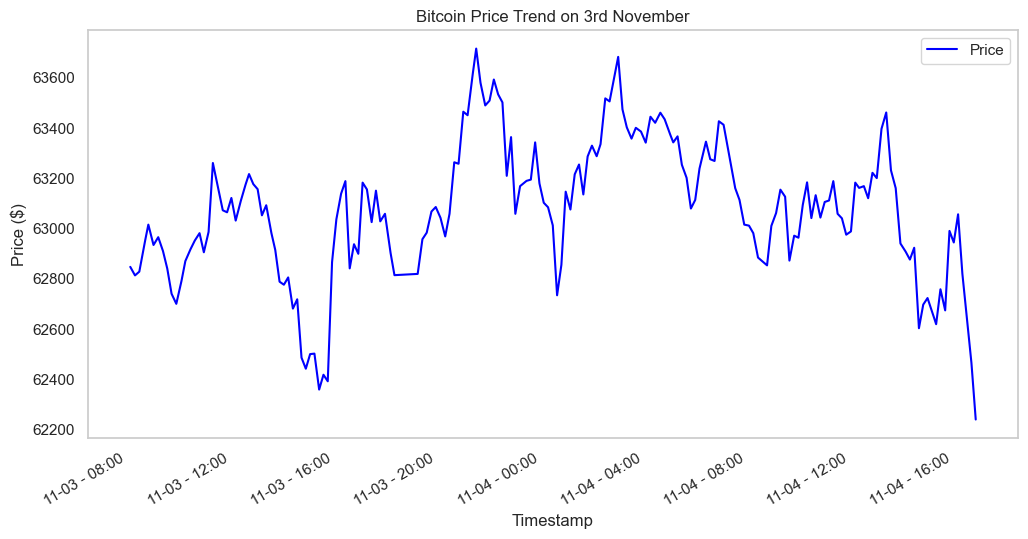

In [ ]:
# Price trend Chart - LINE CHART
# Ensure 'Last Updated' is datetime and set as index
if df.index.name != 'Last Updated':
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    df.set_index('Last Updated', inplace=True)


import matplotlib.dates as mdates



# Plot the price trend
plt.figure(figsize=(12, 6))
plt.plot(coin_data.index, coin_data['Last Traded Price($)'], label='Price', color='blue')

# Formatting the x-axis to show timestamps
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d - %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=12))  # Adjust interval as needed
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

plt.title(f'{coin_name} Price Trend on 3rd November')
plt.xlabel('Timestamp')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

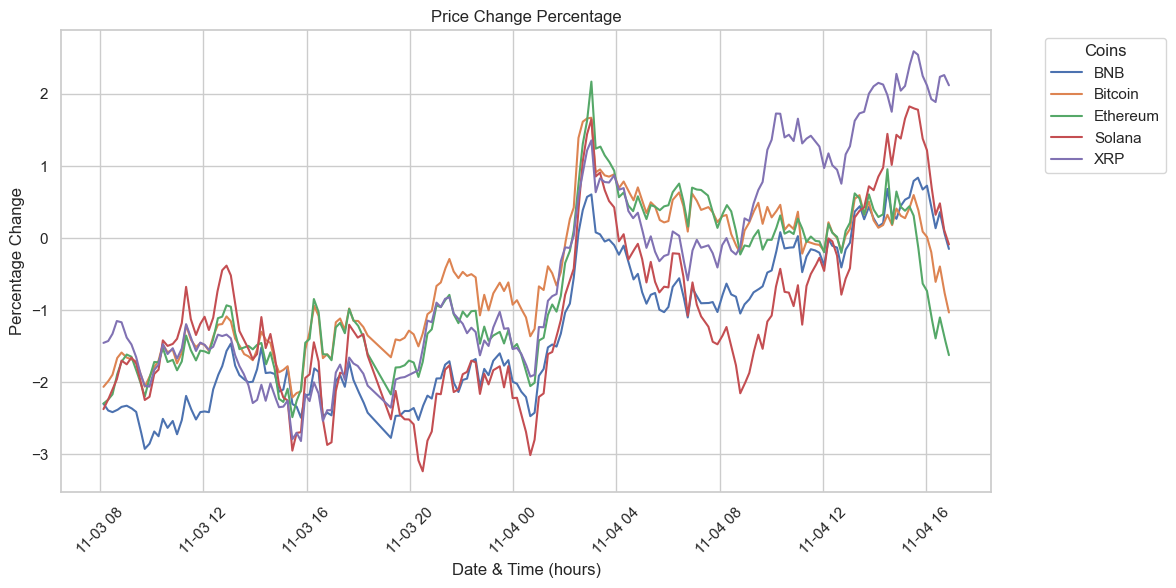

In [116]:
# Price Change Percentage Line chart
plt.figure(figsize=(12,6))

#selecting top coins since too many coins will make a cluster
top_coins = df['Coin Name'].value_counts().head(5).index
df1 = df[df['Coin Name'].isin(top_coins)]

for coin_name, coin_data in df1.groupby('Coin Name'):
    plt.plot(
        coin_data.index,  # X-axis: Time
        coin_data['Price Change Percentage'],  # Y-axis: Percentage change
        label=coin_name  # Label each line with the coin's name
    )

plt.title(f'Price Change Percentage')
plt.xlabel('Date & Time (hours)')
plt.ylabel('Percentage Change')

plt.xticks(rotation=45)
plt.legend(title="Coins", bbox_to_anchor=(1.05, 1), loc='upper left')




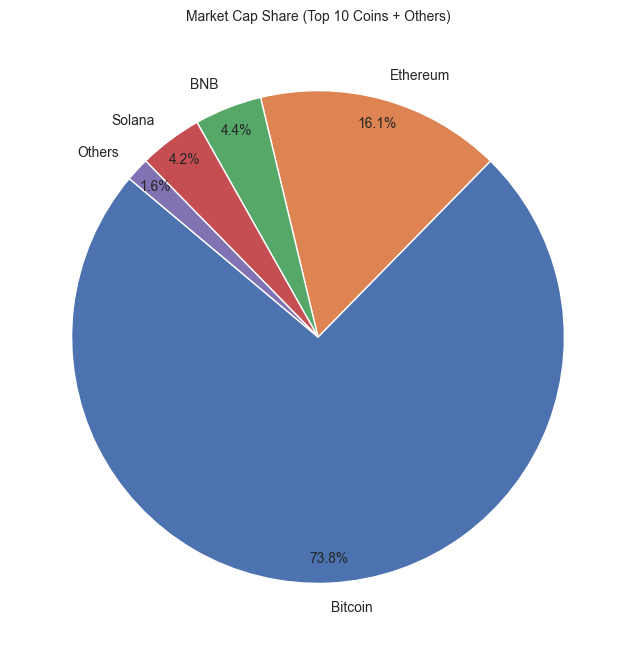

In [ ]:
# Market cap share of different coins - PIE CHART
# Step 1: Aggregate market cap
market_cap_total = df.groupby('Coin Name')['Market Cap ($)'].sum()

# Step 2: Select the top 10 coins
top_10_market_cap = market_cap_total.nlargest(4)
others_market_cap = market_cap_total.sum() - top_10_market_cap.sum()

# Add the "Others" category
top_10_market_cap['Others'] = others_market_cap

# Step 3: Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_10_market_cap, 
    labels=top_10_market_cap.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=.90,  # Adjust percentage label position
    textprops={'fontsize': 10}  # Increase font size for readability
)

# Add title
plt.title("Market Cap Share (Top 10 Coins + Others)", fontsize=10)
plt.show()


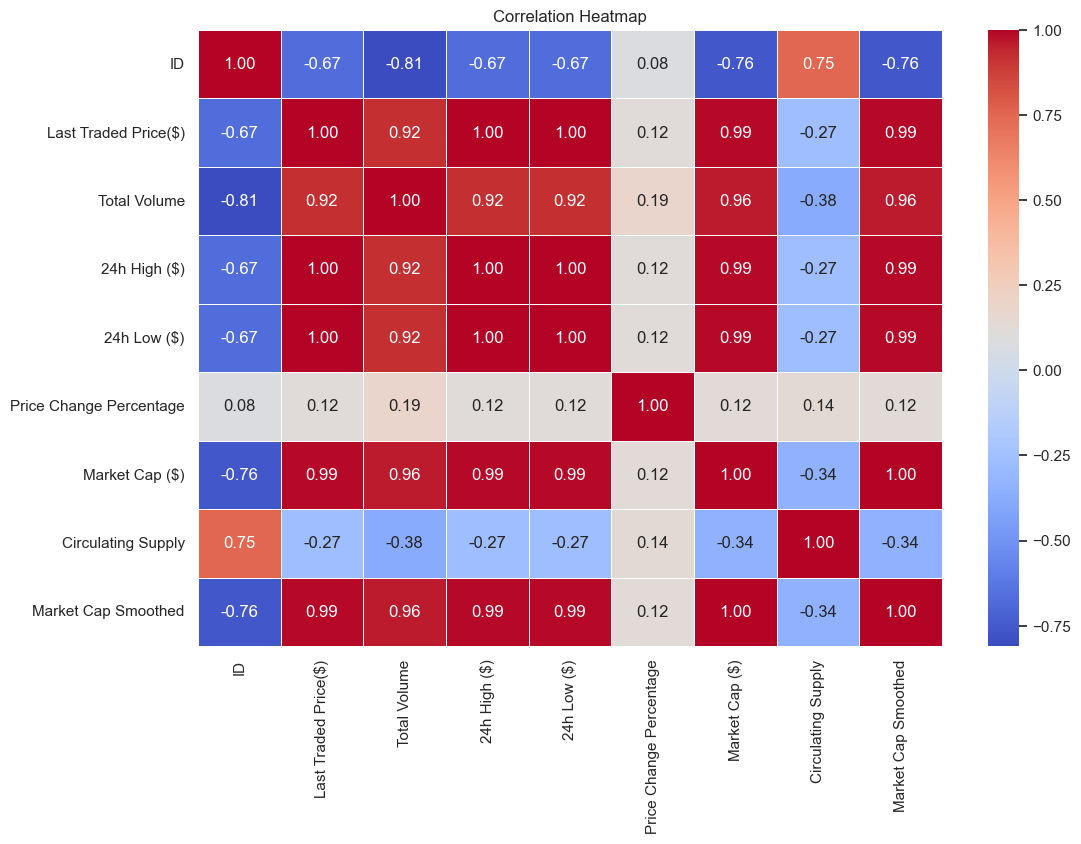

In [ ]:
# Correlation Heatmap
numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_7460\3835622479.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['Last Updated'] = pd.to_datetime(top_10_df['Last Updated'])
C:\Users\SAIF ASHFEE\AppData\Local\Temp\ipykernel_7460\3835622479.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['Hour'] = top_10_df['Last Updated'].dt.hour  # Extract hour for hourly activity


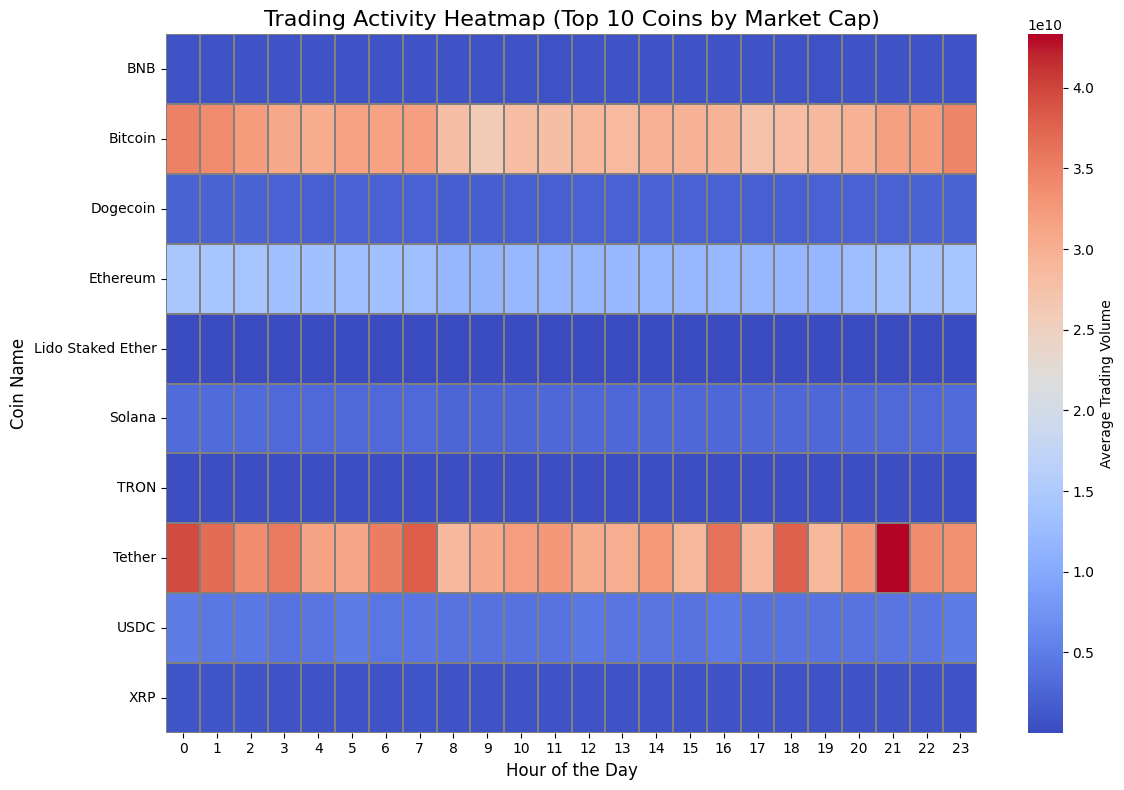

In [ ]:
# Trading activity - Heatmap 

# Determine the top 10 coins by Market Cap (or another metric like Total Volume)
top_10_coins = df.groupby('Coin Name')['Market Cap ($)'].mean().nlargest(10).index

# Filter the DataFrame for only these coins
top_10_df = df[df['Coin Name'].isin(top_10_coins)]

# Convert the 'Last Updated' column to datetime format (if not already)
top_10_df['Last Updated'] = pd.to_datetime(top_10_df['Last Updated'])

# Create new columns for grouping
top_10_df['Hour'] = top_10_df['Last Updated'].dt.hour  # Extract hour for hourly activity

# Group by Coin Name and Hour to get average Total Volume
heatmap_data = top_10_df.groupby(['Coin Name', 'Hour'])['Total Volume'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    cmap='coolwarm',  # Change the colormap if you prefer
    linewidths=0.1, 
    linecolor='gray', 
    cbar_kws={'label': 'Average Trading Volume'}
)

# Add labels and title
plt.title('Trading Activity Heatmap (Top 10 Coins by Market Cap)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Coin Name', fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()


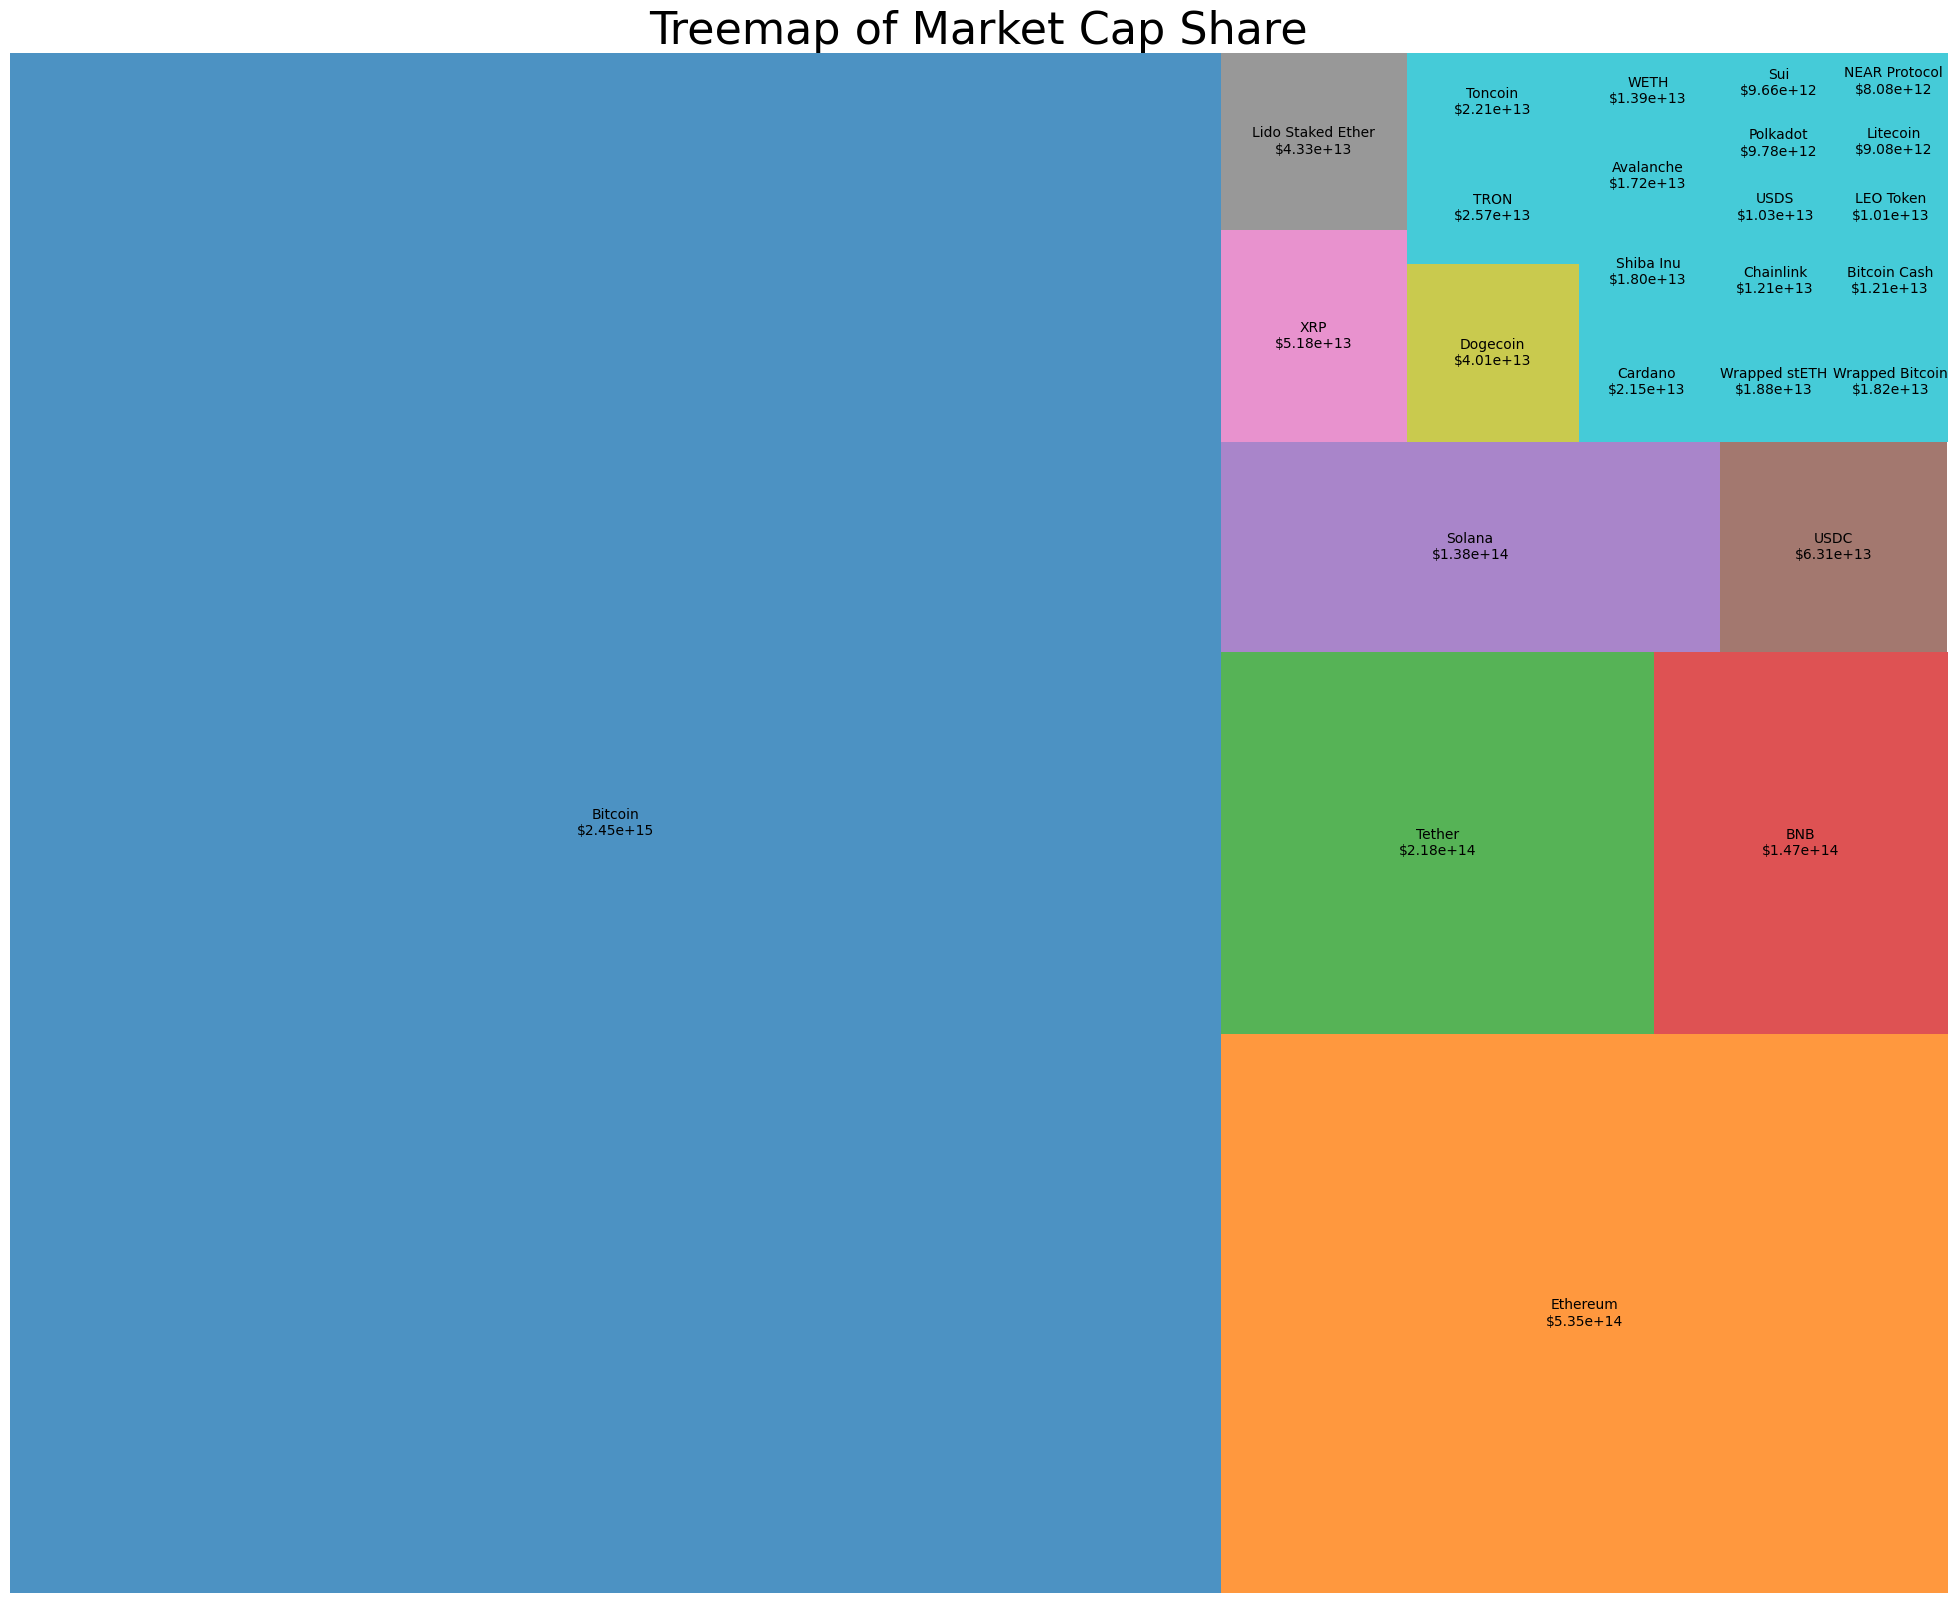

In [4]:
# Treemap of Market Cap Share

# Group by Coin Name and sum the Market Cap
grouped_data = df.groupby('Coin Name', as_index=False).agg({'Market Cap ($)': 'sum'})

# Sort by Market Cap and exclude Bitcoin
top_coins = grouped_data.sort_values(by='Market Cap ($)', ascending=False).head(25)
# Extract data for plotting
sizes = top_coins['Market Cap ($)']  # Sizes of the blocks
labels = [f"{coin}\n${cap:.2e}" for coin, cap in zip(top_coins['Coin Name'], sizes)]  # Labels for each block
# colors = plt.cm.viridis(sizes / sizes.max())  # Normalize sizes for colors
colors = plt.cm.tab10(range(len(sizes)))

# Plot the Treemap
plt.figure(figsize=(25, 20))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title("Treemap of Market Cap Share", fontsize=32)
plt.axis('off')  # Turn off axis
plt.show()
